# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [47]:
# Checking the number of mice.
num_mice = combined_data["Mouse ID"].nunique()

# Display the result
print(f"There are a total of **{num_mice}** unique mice in the dataset.")

There are a total of **249** unique mice in the dataset.


In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# Access the dataframe and search for duplicates of the Mouse IDs
print(f"Duplicate Mouse IDs: {', '.join(dup_id)}")


Duplicate Mouse IDs: g989


In [49]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()

# Filter the dataset to include only the duplicate mice
duplicate_mouse_data = combined_data[combined_data['Mouse ID'].isin(dup_id)]
duplicate_mouse_data 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data[~combined_data['Mouse ID'].isin(dup_id)]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [51]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = clean_df["Mouse ID"].nunique()

# Display the result
print(f"There are a total of **{num_unique_mice}** unique mice in the cleaned dataset.")


There are a total of **248** unique mice in the cleaned dataset.


## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by 'Drug Regimen' and calculate the required statistics
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats.rename(columns={
    'mean': 'Tumor Volume (mm3) Mean',
    'median': 'Tumor Volume (mm3) Median',
    'var': 'Tumor Volume (mm3) Variance',
    'std': 'Tumor Volume (mm3) Standard Deviation',
    'sem': 'Tumor Volume (mm3) SEM'
}, inplace=True)

# Display the summary statistics table
summary_stats


,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [53]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_advanced

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

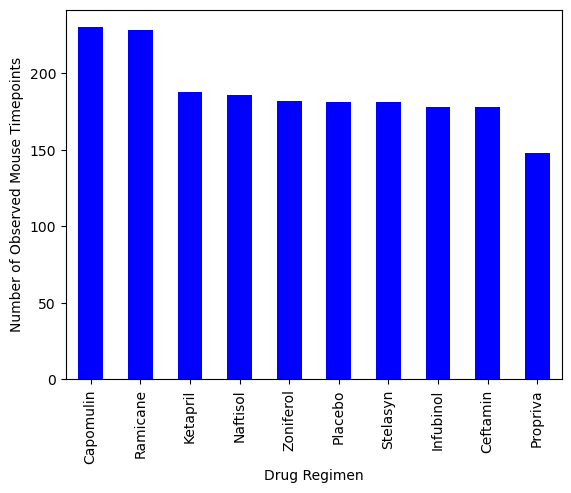

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the mice using each drug regimen
mice_count = clean_df["Drug Regimen"].value_counts()

# Create the bar plot
plot_pandas = mice_count.plot.bar(color='b')

# Set axis labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")

# Show the plot
plt.show()


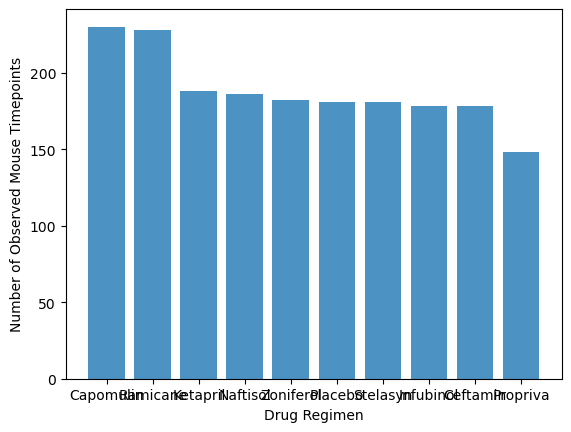

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Count the mice using each drug regimen
mice_count = clean_df["Drug Regimen"].value_counts()

# Create the bar plot
plt.bar(mice_count.index, mice_count.values, color='tab:blue', alpha=0.8, align='center')

# Set axis labels
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")

# Show the plot
plt.show()


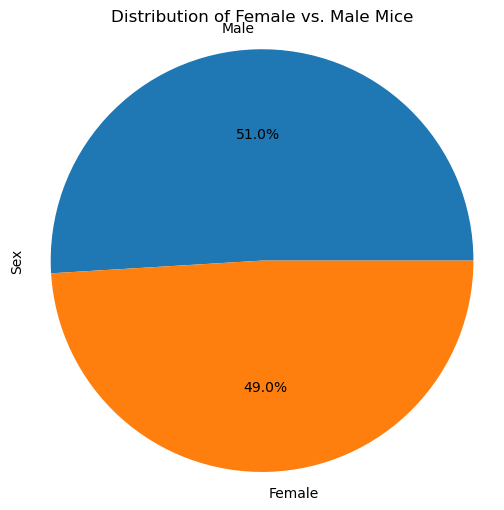

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of each sex in the cleaned data
data_by_sex = clean_df["Sex"].value_counts()

# Plot the distribution as a pie chart with one decimal point in the percentages
data_by_sex.plot.pie(autopct="%1.1f%%", figsize=(6, 6))
plt.ylabel("Sex")  # Set the y-axis label
plt.axis("equal")  # Ensure the pie chart is circular
plt.title("Distribution of Female vs. Male Mice")  # Add a title
plt.show()  # Display the plot


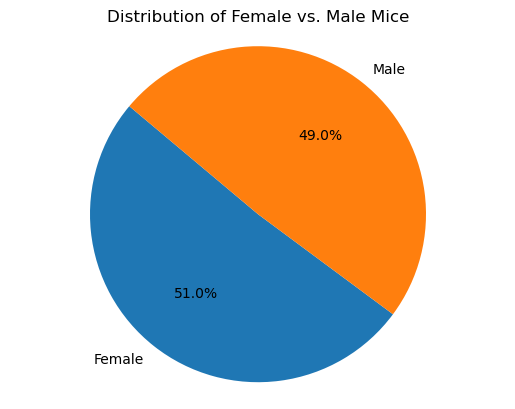

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of each sex in the cleaned data
data_by_sex = clean_df["Sex"].value_counts()

# Create the pie plot
plt.pie(data_by_sex, labels=["Female", "Male"],  autopct="%1.1f%%", startangle=140)
plt.axis("equal")  # Ensure the pie chart is circular
plt.title("Distribution of Female vs. Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Get the last timepoint for each mouse
each_mouse = combined_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group DataFrame with the original DataFrame
merged_df = each_mouse.merge(combined_data, on=["Mouse ID", "Timepoint"], how="left")

# Extract relevant columns (Mouse ID, Timepoint, Tumor Volume, Drug Regimen)
final_tumor_volume_df = merged_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Drug Regimen"]]

# Display the resulting DataFrame
final_tumor_volume_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn


In [59]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
    
  # Calculate IQR and identify potential outliers
for regimen in treatment_regimens:
    # Locate rows for the current regimen
    regimen_df = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == regimen]["Tumor Volume (mm3)"]
    
    # Calculate quartiles and IQR
    quartiles = regimen_df.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine potential outliers
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    
    # Check for outliers
    outliers = regimen_df[(regimen_df < lower_bound) | (regimen_df > upper_bound)]
    
    # Print results
    print(f"Regimen: {regimen}")
    print(f"IQR: {iqr:.2f}")
    print(f"Potential outliers: {outliers.tolist()}\n")



Regimen: Capomulin
IQR: 7.78
Potential outliers: []

Regimen: Ramicane
IQR: 9.10
Potential outliers: []

Regimen: Infubinol
IQR: 11.48
Potential outliers: [36.3213458]

Regimen: Ceftamin
IQR: 15.58
Potential outliers: []



In [60]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# Filter data for Capomulin regimen
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# Select a specific mouse (e.g., Mouse ID: l509)
mouse_id = "l509"
line_df = capomulin_df.loc[capomulin_df["Mouse ID"] == mouse_id]

# Extract timepoints and tumor volumes
x_axis = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]

# Display the extracted data
line_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


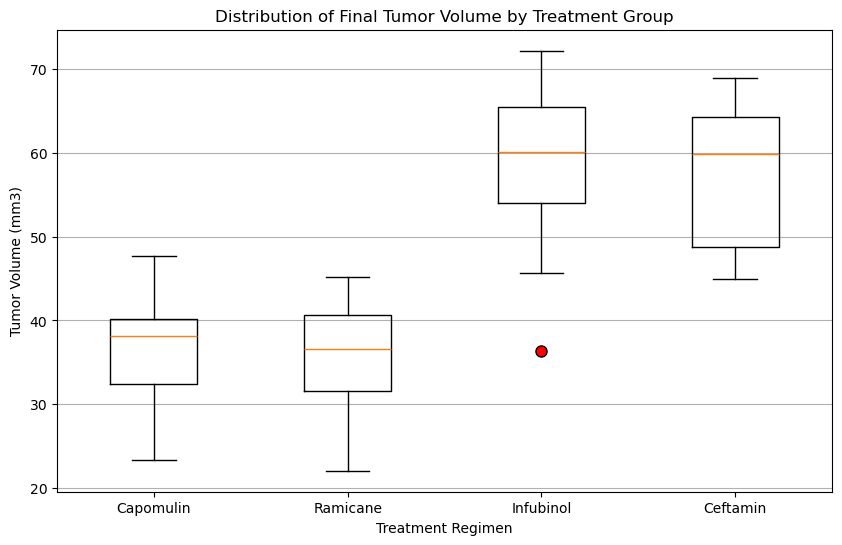

In [62]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Import necessary libraries
import matplotlib.pyplot as plt

# Create a list of tumor volumes for each treatment group
tumor_volumes = [final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == regimen]["Tumor Volume (mm3)"] for regimen in treatment_regimens]

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=treatment_regimens, flierprops={"marker": "o", "markerfacecolor": "red", "markersize": 8})
plt.title("Distribution of Final Tumor Volume by Treatment Group")
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis="y")
plt.show()


## Line and Scatter Plots

Available Mouse IDs: ['s185' 'x401' 'm601' 'f966' 'u364' 'y793' 'r554' 'm957' 't565' 'i738'
 'w914' 'g288' 'l897' 'b742' 'b128' 'j246' 'j119' 'w150' 'v923' 'g316'
 's710' 'l509' 'r944' 'i557' 'r157']


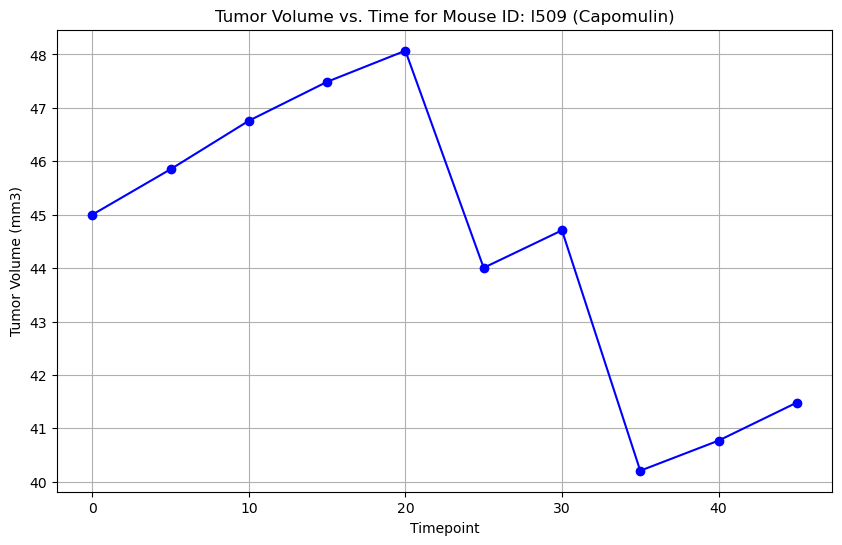

In [63]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
unique_mouse_ids = Capomulin_df['Mouse ID'].unique()
print("Available Mouse IDs:", unique_mouse_ids)

# Filter data for Capomulin regimen and specific mouse ID
mouse_data = Capomulin_df[Capomulin_df["Mouse ID"] == mouse_id]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], marker='o', color='b')
plt.title(f"Tumor Volume vs. Time for Mouse ID: {mouse_id} (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()


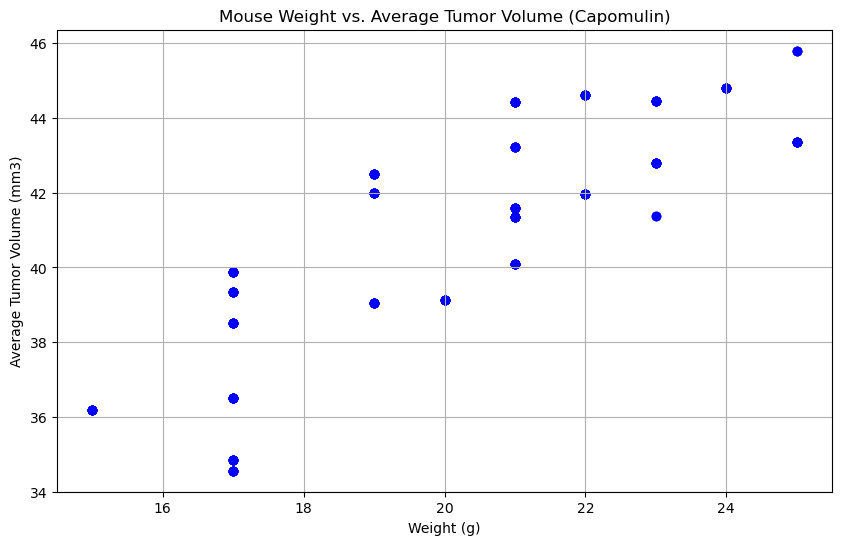

In [64]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average tumor volume for each mouse in the Capomulin regimen
capomulin_avg_tumor = Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume back to the original dataframe
merged_df = pd.merge(Capomulin_df, capomulin_avg_tumor, on="Mouse ID", suffixes=("", "_avg"))

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["Weight (g)"], merged_df["Tumor Volume (mm3)_avg"], marker="o", color="b", alpha=0.8)
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8343958614425967


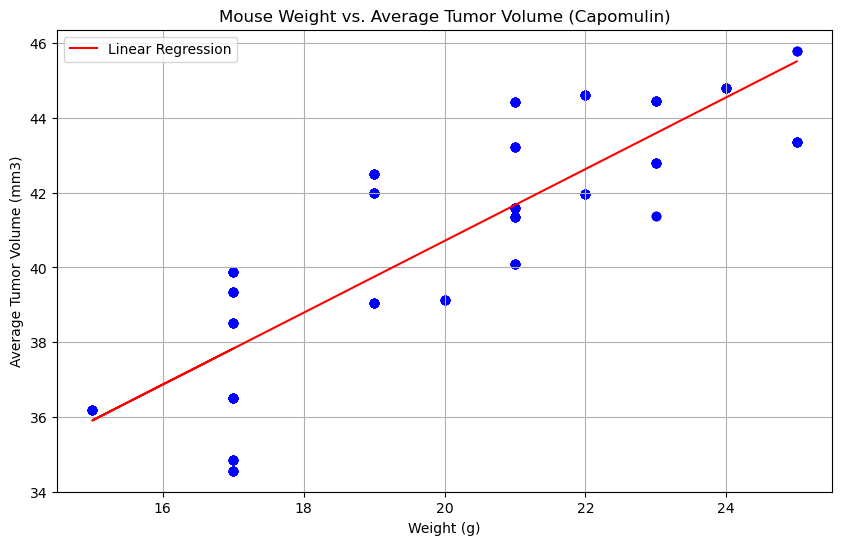

In [65]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, linregress

# Calculate the average tumor volume for each mouse in the Capomulin regimen
capomulin_avg_tumor = Capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Merge the average tumor volume back to the original dataframe
merged_df = pd.merge(Capomulin_df, capomulin_avg_tumor, on="Mouse ID", suffixes=("", "_avg"))

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(merged_df["Weight (g)"], merged_df["Tumor Volume (mm3)_avg"])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Calculate the linear regression model
slope, intercept, r_value, p_value, std_err = linregress(merged_df["Weight (g)"], merged_df["Tumor Volume (mm3)_avg"])

# Create the scatter plot with the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_df["Weight (g)"], merged_df["Tumor Volume (mm3)_avg"], marker="o", color="b", alpha=0.8)
plt.plot(merged_df["Weight (g)"], slope * merged_df["Weight (g)"] + intercept, color="r", label="Linear Regression")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.grid()
plt.show()
